# Final Project

You have made it to the end of the course.
In the labs, you saw a couple simplified examples of constructing data stories.

For the final project, you will 
 1. find some data, 
 2. upload it to JupyterHub
 3. construct a data story

---

## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview your story you hope to uncover.

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name of the file that is now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the a data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, and perform some exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [1]:
df <- read.csv('/dsa/data/all_datasets/congress-terms.csv')
head(df)

congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
80,house,M000112,Joseph,Jefferson,Mansfield,,1861-02-09,TX,D,Yes,1/3/47,85.9
80,house,D000448,Robert,Lee,Doughton,,1863-11-07,NC,D,Yes,1/3/47,83.2
80,house,S000001,Adolph,Joachim,Sabath,,1866-04-04,IL,D,Yes,1/3/47,80.7
80,house,E000023,Charles,Aubrey,Eaton,,1868-03-29,NJ,R,Yes,1/3/47,78.8
80,house,L000296,William,,Lewis,,1868-09-22,KY,R,No,1/3/47,78.3
80,house,G000017,James,A.,Gallagher,,1869-01-16,PA,R,No,1/3/47,78.0


In [2]:
# Let's see how many Democrats and Republicans there are.

df1 <- split(df, df$party)
Republican <- df1$R
Democrat <- df1$D

Rs <- nrow(Republican)
Ds <- nrow(Democrat)

paste("There are", Rs, "Republicans")
paste("There are", Ds, "Democrats")

[1] "There are 8274 Republicans"

[1] "There are 10290 Democrats"

In [3]:
# Now let's see if the makeup has changed over time

df2 <- split(df, df$congress)
eighty <- df2$'80'
onethirteen <- df2$'113'
df3 <- split(eighty, eighty$party)
R80 <- df3$R
D80 <- df3$D
df4 <- split(onethirteen, onethirteen$party)
R113 <- df4$R
D113 <- df4$D

R1947 <- nrow(R80)
D1947 <- nrow(D80)
R2013 <- nrow(R113)
D2013 <- nrow(D113)

paste("There were", R1947, "Republicans in 1947, and", R2013, "Republicans in 2013")
paste("There were", D1947, "Democrats in 1947, and", D2013, "Democrats in 2013")


# Compared to in 1947, the congress was a bit more balanced in 2013. However, it looks like there has always been a fairly
# even split between Democrats and Republicans in congress.

[1] "There were 306 Republicans in 1947, and 283 in 2013"

[1] "There were 247 Democrats in 1947, and 259 in 2013"

In [4]:
#Let's see which state has sent the most Republicans and Democrats to congress

library(dplyr)

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

most_dems <- getmode(Democrat$state)
most_reps <- getmode(Republican$state)

library(dplyr)
df5 <- Democrat %>% filter(state == most_dems)
head(df5)

df6 <- Republican %>% filter(state == most_reps)
head(df6)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
80,house,L000163,Clarence,Frederick,Lea,,1874-07-11,CA,D,Yes,1/3/47,72.5
80,house,H000356,Franck,Roberts,Havenner,,1882-09-20,CA,D,Yes,1/3/47,64.3
80,house,S000335,Harry,Richard,Sheppard,,1885-01-10,CA,D,Yes,1/3/47,62.0
80,house,M000727,George,Paul,Miller,,1891-01-15,CA,D,Yes,1/3/47,56.0
80,house,E000119,Alfred,James,Elliott,,1895-06-01,CA,D,Yes,1/3/47,51.6
80,house,K000196,Cecil,Rhodes,King,,1898-01-13,CA,D,Yes,1/3/47,49.0


congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
80,house,W000265,Richard,Joseph,Welch,,1869-02-13,CA,R,Yes,1/3/47,77.9
80,house,B000750,Willis,Winter,Bradley,,1884-06-28,CA,R,No,1/3/47,62.5
80,house,P000309,John,,Phillips,,1887-09-11,CA,R,Yes,1/3/47,59.3
80,house,J000157,Justin,Leroy,Johnson,,1888-04-08,CA,R,Yes,1/3/47,58.7
80,house,G000111,Bertrand,Wesley,Gearhart,,1890-05-31,CA,R,Yes,1/3/47,56.6
80,house,H000640,John,Carl Williams,Hinshaw,,1894-07-28,CA,R,Yes,1/3/47,52.4


In [5]:
# This clearly is not very useful. Since the number of representatives a state gets is based on its population, CA has the most
# from each party. Therefore, we are instead going to focus on senators, for which there are two per state

## Step 5: Filter Results

Perform you data carpentry that helps in your story telling here.

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [6]:
# We are going to focus on senators because there are fewer of them, and they are elected statewide. Therefore they are a better
# indicator of a states' overall voting preference

df7 <- split(df, df$chamber)

Senate <- df7$senate
Senate



,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
454,80,senate,C000133,Arthur,,Capper,,1865-07-14,KS,R,Yes,1/3/47,81.5
455,80,senate,G000418,Theodore,Francis,Green,,1867-10-02,RI,D,Yes,1/3/47,79.3
456,80,senate,M000499,Kenneth,Douglas,McKellar,,1869-01-29,TN,D,Yes,1/3/47,77.9
457,80,senate,R000112,Clyde,Martin,Reed,,1871-10-19,KS,R,Yes,1/3/47,75.2
458,80,senate,M000895,Edward,Hall,Moore,,1871-11-19,OK,R,Yes,1/3/47,75.1
459,80,senate,O000146,John,Holmes,Overton,,1875-09-17,LA,D,Yes,1/3/47,71.3
460,80,senate,M001108,James,Edward,Murray,,1876-05-03,MT,D,Yes,1/3/47,70.7
461,80,senate,M000308,Patrick,Anthony,McCarran,,1876-08-08,NV,D,Yes,1/3/47,70.4
462,80,senate,T000165,Elmer,,Thomas,,1876-09-08,OK,D,Yes,1/3/47,70.3


In [7]:
# Now we'll do the same analysis, but only using senate data

df8 <- split(Senate, Senate$party)
Senate_Dems <- df8$D
Senate_Reps <- df8$R

most_dems <- getmode(Senate_Dems$state)
most_reps <- getmode(Senate_Reps$state)

df9 <- Senate_Dems %>% filter(state == most_dems)
head(df9)

df10 <- Senate_Reps %>% filter(state == most_reps)
head(df10)

congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
80,senate,K000176,Harley,Martin,Kilgore,,1893-01-11,WV,D,Yes,1/3/47,54.0
81,senate,N000023,Matthew,Mansfield,Neely,,1874-11-09,WV,D,No,1/3/49,74.1
81,senate,K000176,Harley,Martin,Kilgore,,1893-01-11,WV,D,Yes,1/3/49,56.0
82,senate,N000023,Matthew,Mansfield,Neely,,1874-11-09,WV,D,Yes,1/3/51,76.1
82,senate,K000176,Harley,Martin,Kilgore,,1893-01-11,WV,D,Yes,1/3/51,58.0
83,senate,N000023,Matthew,Mansfield,Neely,,1874-11-09,WV,D,Yes,1/3/53,78.1


congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
80,senate,C000133,Arthur,,Capper,,1865-07-14,KS,R,Yes,1/3/47,81.5
80,senate,R000112,Clyde,Martin,Reed,,1871-10-19,KS,R,Yes,1/3/47,75.2
81,senate,R000112,Clyde,Martin,Reed,,1871-10-19,KS,R,Yes,1/3/49,77.2
81,senate,C000154,Frank,,Carlson,,1893-01-23,KS,R,No,1/3/49,55.9
81,senate,S000138,Andrew,Frank,Schoeppel,,1894-11-23,KS,R,No,1/3/49,54.1
81,senate,D000048,Harry,,Darby,,1895-01-23,KS,R,No,1/3/49,53.9


In [8]:
# This is a bit better. This tells us that since 1947, Kansas has elected the most Republicans to the US senate and West
# Virginia has elected the most Democrats. We are getting closer to our answer of which have been the most Democrat-friendly
# and Republican-friendly states.

party_count <- Senate %>% group_by(state) %>% summarise(Republicans = length(which(party == 'R')), Democrats = length(which(party == 'D')))
party_count

state,Republicans,Democrats
<fct>,<int>,<int>
AK,39,19
AL,23,48
AR,5,64
AZ,45,23
CA,31,45
CO,40,29
CT,21,47
DE,35,36
FL,19,52


In [9]:
# Now we can see the exact number of Republicans and Democrats elected from each state from 1947 to 2013. 

## Step 6: Visuals 

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

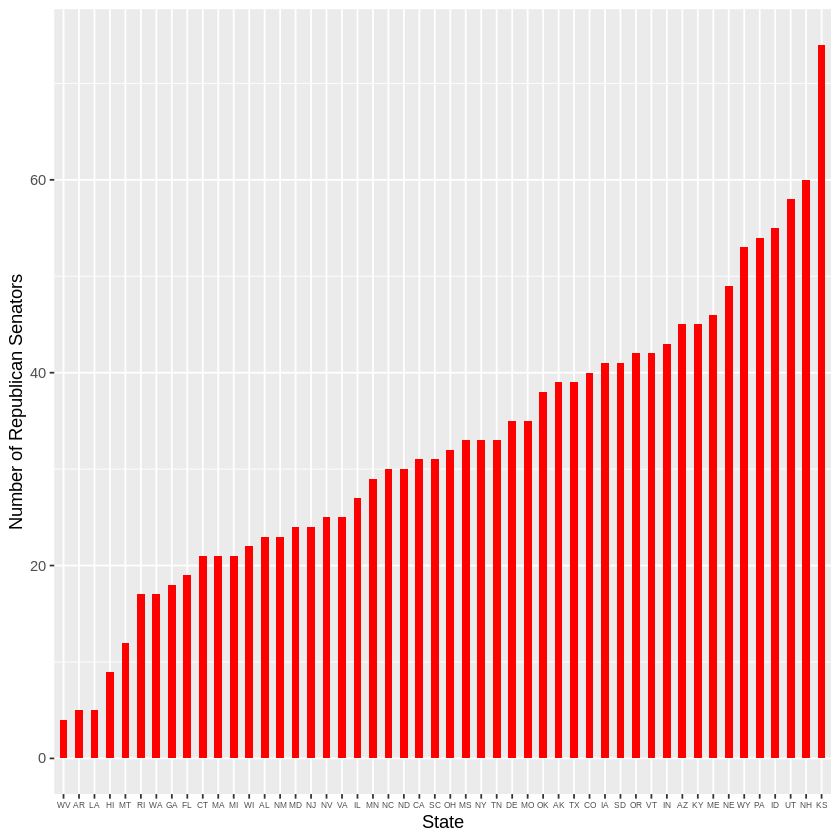

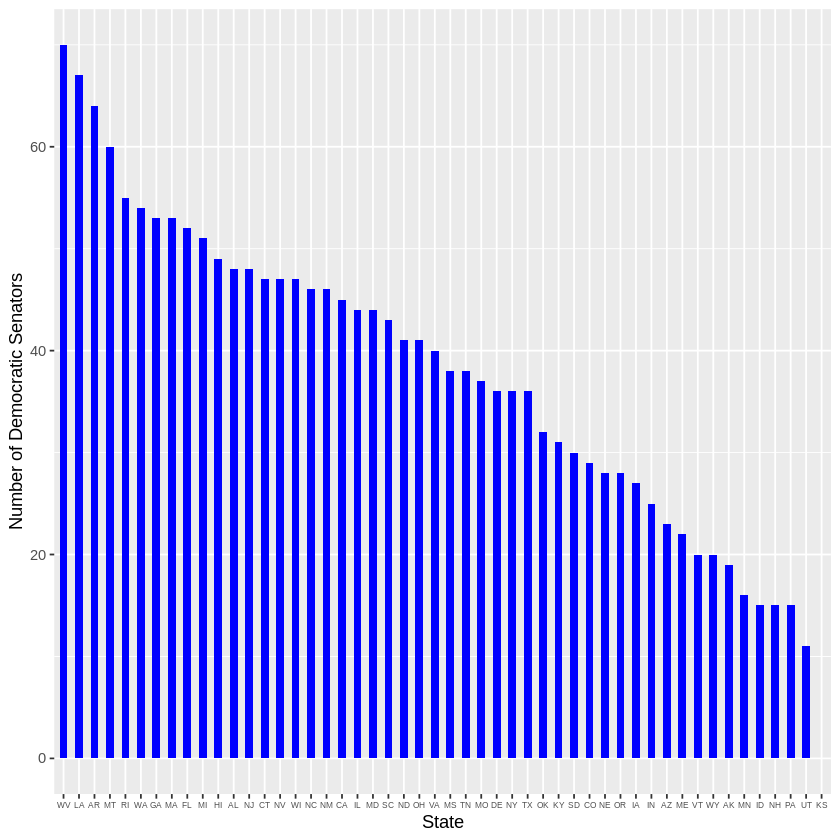

In [10]:
# Now we will make graphs of all the states ordered by number of senators they have had per party

library(ggplot2)

r_graph <- ggplot(data=party_count, aes(x=reorder(state, Republicans), y=Republicans)) + 
    geom_bar(stat="identity", fill="red", width=0.5) +
    xlab("State") + ylab("Number of Republican Senators") +
    theme(axis.text.x = element_text(size=5))
r_graph

d_graph <- ggplot(data=party_count, aes(x=reorder(state, -Democrats), y=Democrats)) +
    geom_bar(stat="identity", fill="blue", width=0.5) +
    xlab("State") + ylab("Number of Democratic Senators") +
    theme(axis.text.x = element_text(size=5))
d_graph



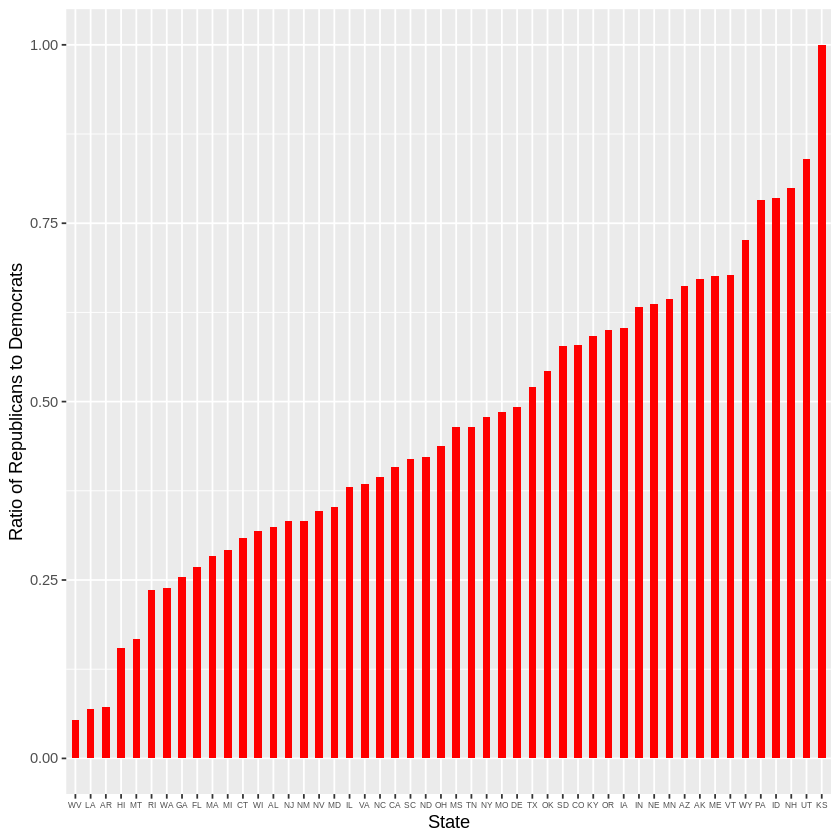

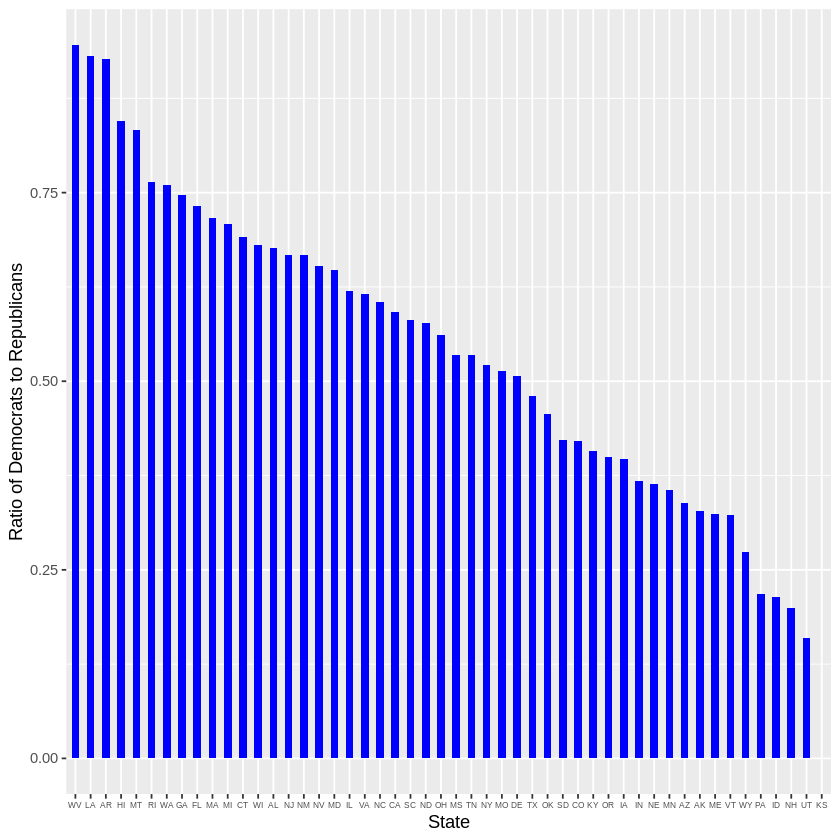

In [11]:
# Looking at the x-axis, we can see that the ordering of both graphs is very similar, but not identical. From these we can see
# which states have elected the most and fewest of each party, but not necessarily their D to R proportions.

party_count$R_to_D <- party_count$Republicans/(party_count$Republicans + party_count$Democrats)
party_count$D_to_R <- party_count$Democrats/(party_count$Democrats + party_count$Republicans)

# If we use the ratios rather than the raw totals, the axes of our two graphs should match up perfectly now

r_graph2 <- ggplot(data=party_count, aes(x=reorder(state, R_to_D), y=R_to_D)) + 
    geom_bar(stat="identity", fill="red", width=0.5) +
    xlab("State") + ylab("Ratio of Republicans to Democrats") +
    theme(axis.text.x = element_text(size=5))
r_graph2

d_graph2 <- ggplot(data=party_count, aes(x=reorder(state, -D_to_R), y=D_to_R)) +
    geom_bar(stat="identity", fill="blue", width=0.5) +
    xlab("State") + ylab("Ratio of Democrats to Republicans") +
    theme(axis.text.x = element_text(size=5))
d_graph2

# They do! Now we can conclusively order all 50 states by their party preference.

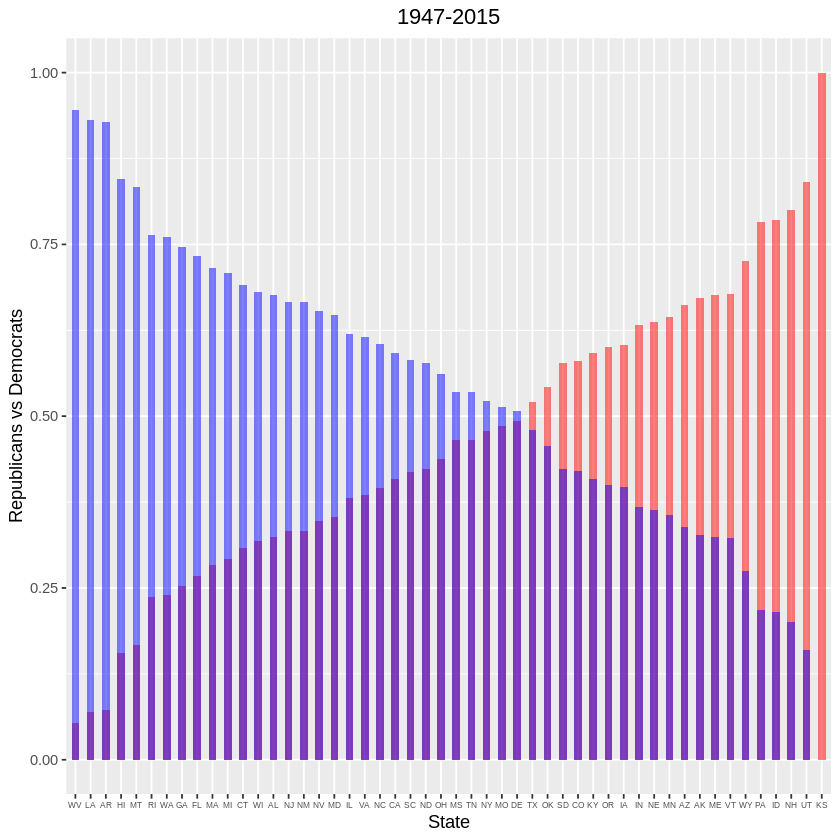

In [28]:
# Now that the axes match up, we can plot them on a single graph. The state with the most purple should give us the most 
# politically balanced state during this time period.

blue <- rgb(0, 0, 1, alpha=0.5)
red <- rgb(1, 0, 0, alpha=0.5)

r_to_d_graph <- ggplot(data=party_count, aes(x=reorder(state, R_to_D))) + 
    geom_bar(aes(y = R_to_D), stat="identity", fill=red, width=0.5) +
    geom_bar(aes(y = D_to_R), stat="identity", fill=blue, width=0.5) +
    xlab("State") + ylab("Republicans vs Democrats") + ggtitle("1947-2015") +
    theme(axis.text.x = element_text(size=5), plot.title = element_text(hjust=0.5))
r_to_d_graph

# As we can see, the most Democrat-friendly state has been West Virginia, the most Republican-friendly state has been Kansas,
# and the most "politically balanced" state has been Delaware.

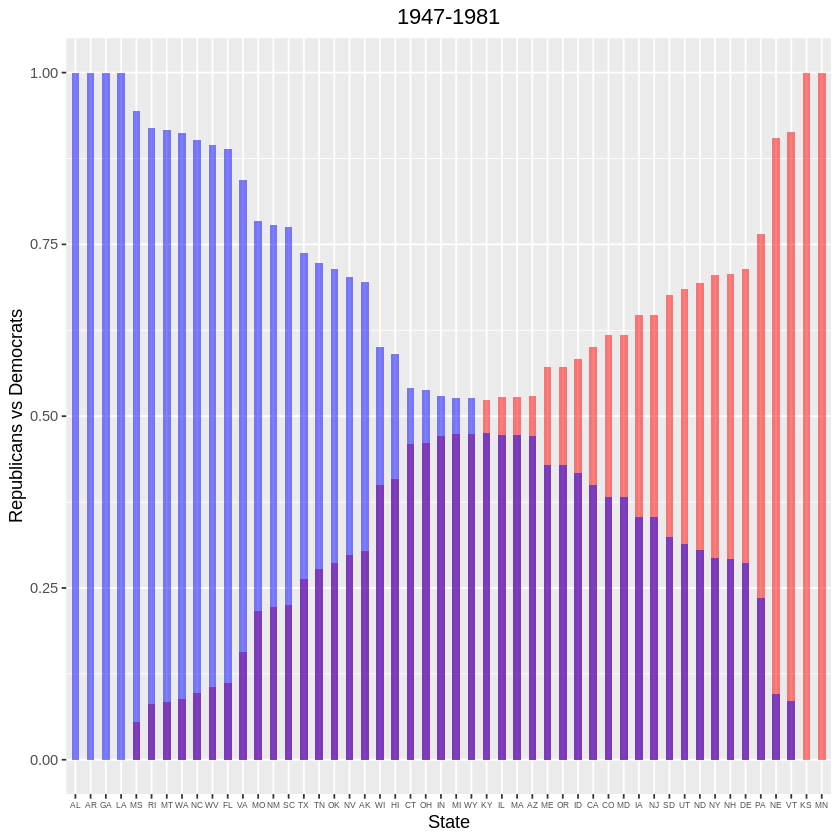

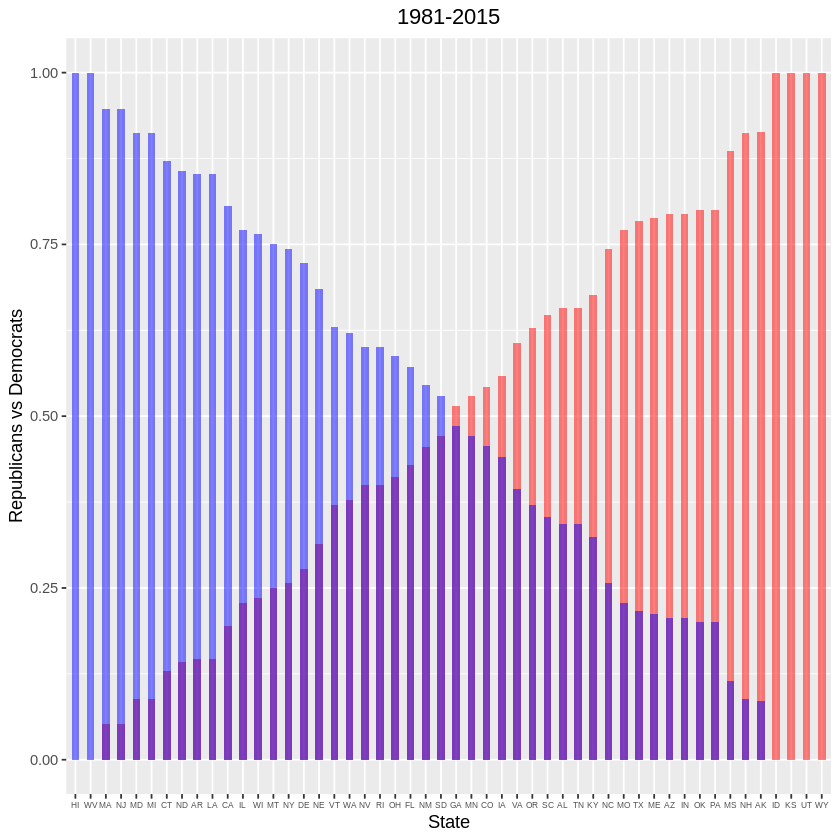

In [27]:
# The last thing I want to find out is if the political preferences of the states have changed over time. So we will just
# split the original data set by in half congress and recreate the same graph.

Senate1 <- Senate %>% filter(congress < 97)
Senate2 <- Senate %>% filter(congress > 96)

party_count1 <- Senate1 %>% group_by(state) %>% summarise(Republicans = length(which(party == 'R')), Democrats = length(which(party == 'D')))
party_count1$R_to_D <- party_count1$Republicans/(party_count1$Republicans + party_count1$Democrats)
party_count1$D_to_R <- party_count1$Democrats/(party_count1$Democrats + party_count1$Republicans)

party_count2 <- Senate2 %>% group_by(state) %>% summarise(Republicans = length(which(party == 'R')), Democrats = length(which(party == 'D')))
party_count2$R_to_D <- party_count2$Republicans/(party_count2$Republicans + party_count2$Democrats)
party_count2$D_to_R <- party_count2$Democrats/(party_count2$Democrats + party_count2$Republicans)

r_to_d_graph1 <- ggplot(data=party_count1, aes(x=reorder(state, R_to_D))) + 
    geom_bar(aes(y = R_to_D), stat="identity", fill=red, width=0.5) +
    geom_bar(aes(y = D_to_R), stat="identity", fill=blue, width=0.5) +
    xlab("State") + ylab("Republicans vs Democrats") + ggtitle("1947-1981") +
    theme(axis.text.x = element_text(size=5), plot.title = element_text(hjust=0.5))
r_to_d_graph1

r_to_d_graph2 <- ggplot(data=party_count2, aes(x=reorder(state, R_to_D))) + 
    geom_bar(aes(y = R_to_D), stat="identity", fill=red, width=0.5) +
    geom_bar(aes(y = D_to_R), stat="identity", fill=blue, width=0.5) +
    xlab("State") + ylab("Republicans vs Democrats") + ggtitle("1981-2015") +
    theme(axis.text.x = element_text(size=5), plot.title = element_text(hjust=0.5))
r_to_d_graph2

## Conclusion: Tell the Story
In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel. 

Feel free to post more examples for people to look at and give feedback about. Your classmates will be vital providers of feedback in this process. Utilize them.

# Save your notebook, then `File > Close and Halt`